In [1]:
from pyrocko import util, model, io, trace, moment_tensor, gmtpy,orthodrome
from pyrocko import orthodrome as od
from pyrocko.client import catalog
from pyrocko.automap import Map
import pyrocko.moment_tensor as pmt
from pyrocko.plot import mpl_color
from pyrocko.guts import load
# from seiscloud import plot as scp
# from seiscloud import cluster as scc
import numpy as np
import os
# import shutil
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime

import pygmt

In [8]:
workdir='../../clusty_flegrei/'
catdir_VT=os.path.join(workdir,'results_VT')

catname=os.path.join(catdir_VT,'cat_trimmed_mean_ccs_dbscan_comb_0.150_3.yaml')
clusty_events_VT=model.load_events(catname,format='yaml')

In [10]:
# VT
cluster_number=[]
cluster_color=[]
for ev in clusty_events_VT:
    if not ev.extras['cluster_number'] in cluster_number:
        cluster_number.append(ev.extras['cluster_number'])
        cluster_color.append(ev)

cls_VT = {key: [] for key in cluster_number}
for ev in clusty_events_VT:
    cls_VT[ev.extras['cluster_number']].append(ev)

cls_color_VT = {key: [] for key in cluster_number}
for color in cluster_color:
    cls_color_VT[color.extras['cluster_number']].append(color.extras['color'])

for key in cls_VT:
    print(f'cluster {key} with n ev = {len(cls_VT[key])}')
    print(f'cluster {key} with color {cls_color_VT[key]}\n')

cluster 0 with n ev = 18
cluster 0 with color ['#00A08B']

cluster 2 with n ev = 12
cluster 2 with color ['#6A76FC']

cluster 1 with n ev = 19
cluster 1 with color ['#FD3216']

cluster 4 with n ev = 11
cluster 4 with color ['#620042']

cluster -1 with n ev = 34
cluster -1 with color ['#000000']

cluster 3 with n ev = 4
cluster 3 with color ['#FF9616']

cluster 5 with n ev = 6
cluster 5 with color ['#328a3e']



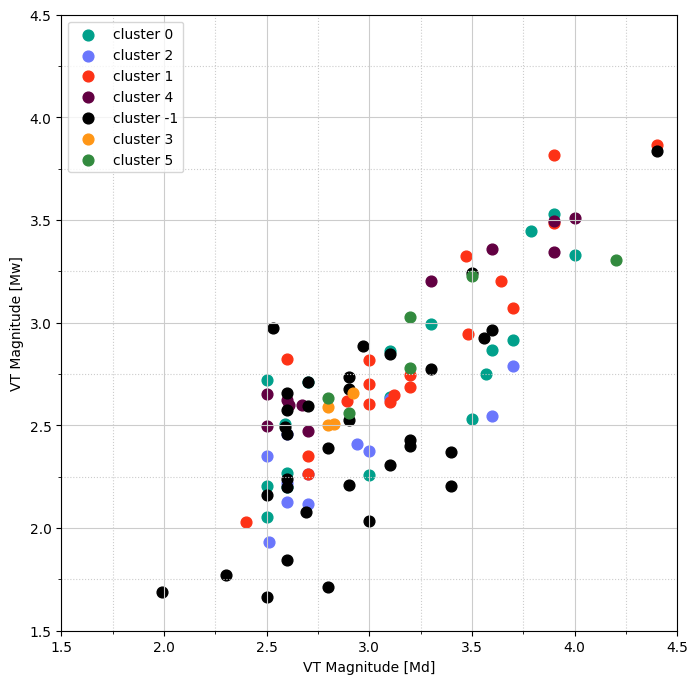

In [ ]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, axs = plt.subplots(1, 1,figsize=(8,8))

lim_xmin=1.5
lim_xmax=4.5
lim_ymin=1.5
lim_ymax=4.5

axs.set_xlabel('VT Magnitude [Md]')
axs.set_ylabel('VT Magnitude [Mw]')
axs.axis('scaled')
axs.set(xlim=(lim_xmin,lim_xmax), ylim=(lim_ymin,lim_ymax))

axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.yaxis.set_major_locator(MultipleLocator(0.5))

# Change minor ticks to show every
axs.xaxis.set_minor_locator(AutoMinorLocator(2))
axs.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
axs.grid(which='major', color='#CCCCCC', linestyle='-')
axs.grid(which='minor', color='#CCCCCC', linestyle=':')

cls_label = []
for cls_name in cls_VT:
    for ev in cls_VT[cls_name]:
        mw= ev.magnitude
        md= float(ev.tags[1].split(':')[1])
        ev_color=ev.extras['color']
        ev_cluster_number=ev.extras['cluster_number']

        if ev_cluster_number not in cls_label: # only one label per cluster
            axs.scatter(md,mw,color=ev_color,label=f'cluster {ev_cluster_number}',s=60)
            cls_label.append(ev_cluster_number)
        else:
            axs.scatter(md,mw,color=ev_color,s=60)

#axs.scatter(ev_vt[1],magnitude_vlp[n],color=ev_vt[2],label=f'cluster {ev_vt[3]}',s=60)

axs.legend(loc=2)

fig.savefig('../PLOTS/TIMELINE_CLUSTERS/Md_Mw_clusters.svg')

In [55]:
workdir='../../clusty_flegrei/'
catdir_VLP=os.path.join(workdir,'results_VLP')

catname=os.path.join(catdir_VLP,'cat_trimmed_mean_ccs_dbscan_comb_0.150_3.yaml')
clusty_events_VLP=model.load_events(catname,format='yaml')

In [56]:
# VLP
cluster_number=['VLP']
cluster_color=['#5D5D5D']

cls_VLP = {key: [] for key in cluster_number}
for ev in clusty_events_VLP:
    cls_VLP[cluster_number[0]].append(ev)

cls_color_VLP = {key: [] for key in cluster_number}
cls_color_VLP[cluster_number[0]].append(cluster_color[0])

for key in cls_VLP:
    print(f'cluster {key} with n ev = {len(cls_VLP[key])}')
    print(f'cluster {key} with color {cls_color_VLP[key]}\n')

cluster VLP with n ev = 14
cluster VLP with color ['#5D5D5D']



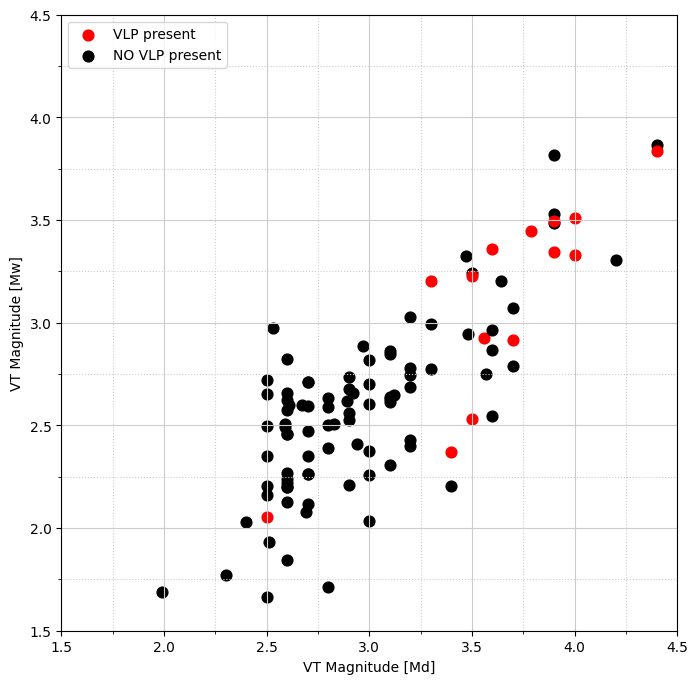

In [65]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, axs = plt.subplots(1, 1,figsize=(8,8))

lim_xmin=1.5
lim_xmax=4.5
lim_ymin=1.5
lim_ymax=4.5

axs.set_xlabel('VT Magnitude [Md]')
axs.set_ylabel('VT Magnitude [Mw]')
axs.axis('scaled')
axs.set(xlim=(lim_xmin,lim_xmax), ylim=(lim_ymin,lim_ymax))

axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.yaxis.set_major_locator(MultipleLocator(0.5))

# Change minor ticks to show every
axs.xaxis.set_minor_locator(AutoMinorLocator(2))
axs.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
axs.grid(which='major', color='#CCCCCC', linestyle='-')
axs.grid(which='minor', color='#CCCCCC', linestyle=':')

cls_label = []
for cls_name in cls_VT:
    for ev in cls_VT[cls_name]:
        mw= ev.magnitude
        md= float(ev.tags[1].split(':')[1])
        ev_color=ev.extras['color']
        ev_cluster_number=ev.extras['cluster_number']

        counter=0
        for ev_VLP in cls_VLP['VLP']:
            if ev.name == ev_VLP.name:
                counter+=1

        if counter == 0: # no VLP present
            if 'NO_VLP' not in cls_label:
                cls_label.append('NO_VLP')
                axs.scatter(md,mw,color='black',label=f'NO VLP present',s=60)
            else:
                axs.scatter(md,mw,color='black',s=60)
                
        elif counter == 1: # VLP present
            if 'VLP' not in cls_label:
                cls_label.append('VLP')
                axs.scatter(md,mw,color='red',label=f'VLP present',s=60)
            else:
                axs.scatter(md,mw,color='red',s=60)
        else:
            print('error: no event matching')
axs.legend(loc=2)

fig.savefig('../PLOTS/TIMELINE_CLUSTERS/Md_Mw_VT_VLP.svg')